# Framing the problem

In today’s digitally connected world, where individuals spend a significant portion of their day interacting with screens, understanding the factors influencing digital well-being has become crucial.

This Xset offers comprehensive insights into the digital habits of 300,000 individuals, capturing their interactions with social media, entertainment platforms, and other online activities, alongside key demographic and behavioral characteristics. Among these, sleep quality—a vital indicator of overall health and productivity—is heavily influenced by digital behavior.

The objective is to develop a predictive model that identifies the most significant factors affecting sleep quality. This will enable businesses, such as wellness app providers and healthcare organizations, to design personalized interventions that promote healthier digital habits. By leveraging this solution, companies can offer tailored recommendations, like limiting late-night notifications or adjusting screen time, to improve user sleep quality.

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn
import numpy as np

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Data Aquisition

In [ ]:
import pandas as pd
X = pd.read_csv("X_entertainment_data.csv")


# Data Exploration

In [ ]:
X.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,1,32,Other,Germany,4.35,4.08,5,TikTok,0.35,5.43,...,20,4.11,Yes,9,Tablet,50GB,Moderate,7,8,33.04
1,2,62,Other,India,4.96,4.21,2,YouTube,2.55,4.22,...,26,4.59,Yes,9,PC,10GB,Low,8,2,497.78
2,3,51,Female,USA,6.78,1.77,4,Facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,Female,India,5.06,9.21,3,YouTube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
4,5,21,Other,Germany,2.57,1.30,4,TikTok,3.97,2.74,...,42,4.14,Yes,7,Smart TV,Unlimited,Low,5,9,35.90


In [ ]:
X = X.drop(columns=['User ID'])


In [ ]:
X.info()
X["Sleep Quality (scale 1-10)"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Age                                         300000 non-null  int64  
 1   Gender                                      300000 non-null  object 
 2   Country                                     300000 non-null  object 
 3   Daily Social Media Time (hrs)               300000 non-null  float64
 4   Daily Entertainment Time (hrs)              300000 non-null  float64
 5   Social Media Platforms Used                 300000 non-null  int64  
 6   Primary Platform                            300000 non-null  object 
 7   Daily Messaging Time (hrs)                  300000 non-null  float64
 8   Daily Video Content Time (hrs)              300000 non-null  float64
 9   Daily Gaming Time (hrs)                     300000 non-null  float64
 

Sleep Quality (scale 1-10)
6     33617
5     33484
8     33440
4     33437
3     33389
7     33160
9     33139
2     33092
1     33067
10      175
Name: count, dtype: int64

In [ ]:
X.describe()

,Age,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Daily Messaging Time (hrs),Daily Video Content Time (hrs),Daily Gaming Time (hrs),Monthly Income (USD),Internet Speed (Mbps),Subscription Platforms,...,Daily Music Listening Time (hrs),Time Spent in Online Communities (hrs),Social Media Fatigue Level (scale 1-10),News Consumption Time (hrs),Ad Interaction Count,Time on Educational Platforms (hrs),Tech Savviness Level (scale 1-10),Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,38.530547,4.254808,5.244080,3.000143,2.598320,3.749153,2.499733,5256.918847,52.481476,2.505213,...,3.246100,2.000779,5.003780,1.500046,24.48071,2.500206,5.009983,5.006430,5.004487,249.670252
std,15.005038,2.165604,2.741804,1.413682,1.385418,1.877316,1.443159,2741.260952,27.394893,1.706361,...,1.587595,1.154578,2.580703,0.866270,14.42579,1.441704,2.584137,2.579214,2.583077,144.372234
min,13.000000,0.500000,0.500000,1.000000,0.200000,0.500000,0.000000,500.010000,5.000000,0.000000,...,0.500000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,26.000000,2.380000,2.870000,2.000000,1.400000,2.120000,1.250000,2883.817500,28.730000,1.000000,...,1.870000,1.000000,3.000000,0.750000,12.00000,1.250000,3.000000,3.000000,3.000000,124.350000
50%,39.000000,4.260000,5.240000,3.000000,2.600000,3.750000,2.500000,5259.010000,52.470000,3.000000,...,3.240000,2.000000,5.000000,1.500000,24.00000,2.500000,5.000000,5.000000,5.000000,249.900000
75%,52.000000,6.130000,7.620000,4.000000,3.790000,5.370000,3.750000,7630.525000,76.210000,4.000000,...,4.620000,3.000000,7.000000,2.250000,37.00000,3.750000,7.000000,7.000000,7.000000,374.370000
max,65.000000,8.000000,10.000000,5.000000,5.000000,7.000000,5.000000,9999.930000,100.000000,5.000000,...,6.000000,4.000000,10.000000,3.000000,50.00000,5.000000,10.000000,10.000000,10.000000,500.000000


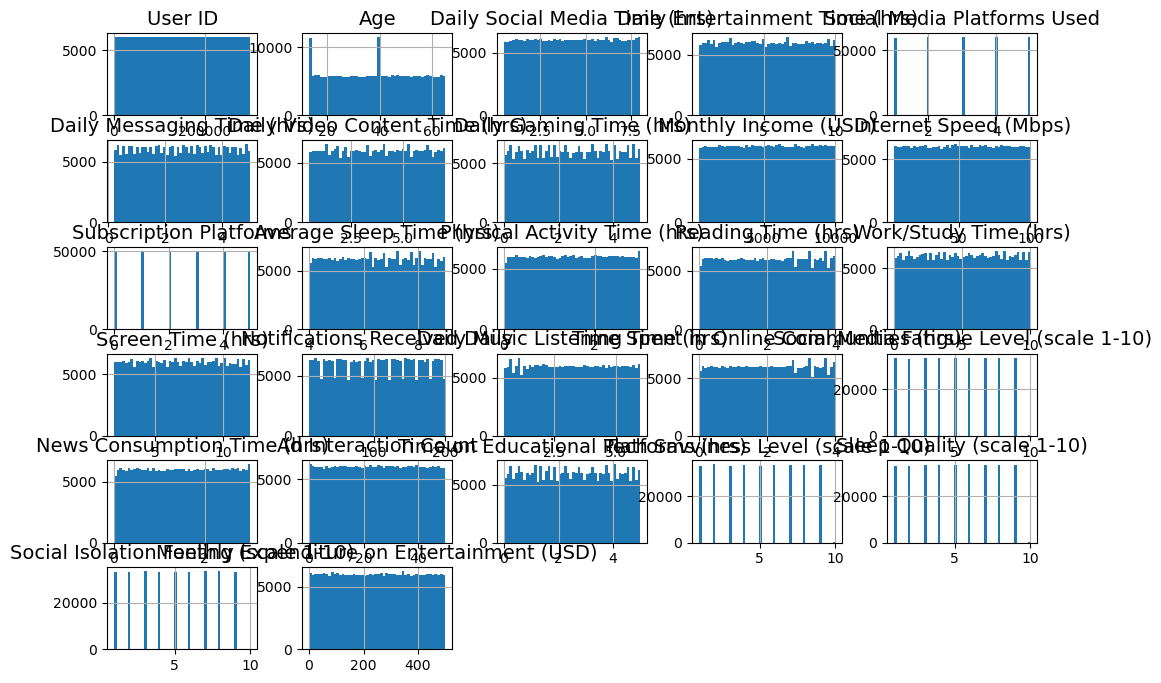

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X.hist(bins=50, figsize=(12, 8))
plt.show()

### Create a Test Set


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
len(train_set)

240000

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(X, X["Sleep Quality (scale 1-10)"]):
    strat_train_set_n = X.iloc[train_index]
    strat_test_set_n = X.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]


In [ ]:
strat_test_set["Sleep Quality (scale 1-10)"].value_counts() / len(strat_test_set)

Sleep Quality (scale 1-10)
6     0.112067
5     0.111617
8     0.111467
4     0.111450
3     0.111300
7     0.110533
9     0.110467
2     0.110300
1     0.110217
10    0.000583
Name: count, dtype: float64

### Discover and Visualize the X to Gain Insights


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
X = strat_train_set.copy()


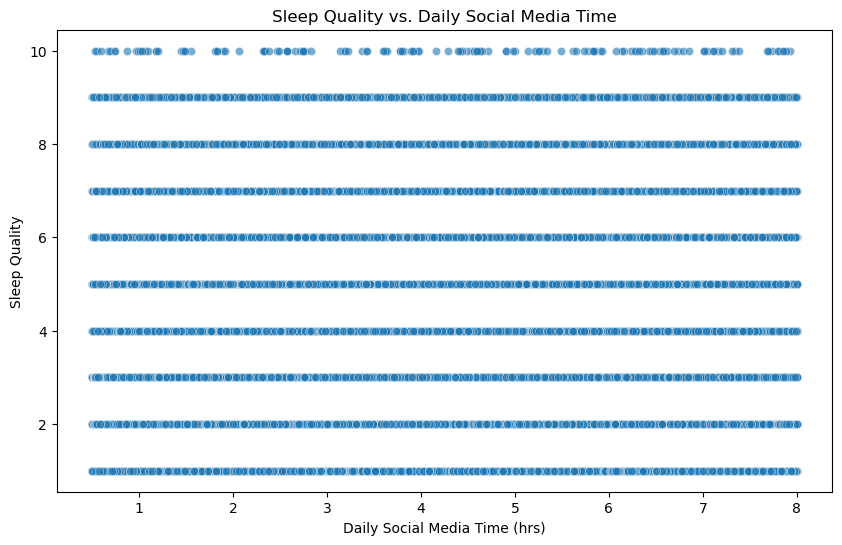

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Daily Social Media Time (hrs)'], y=X['Sleep Quality (scale 1-10)'], alpha=0.6)
plt.title('Sleep Quality vs. Daily Social Media Time')
plt.xlabel('Daily Social Media Time (hrs)')
plt.ylabel('Sleep Quality')
plt.show()

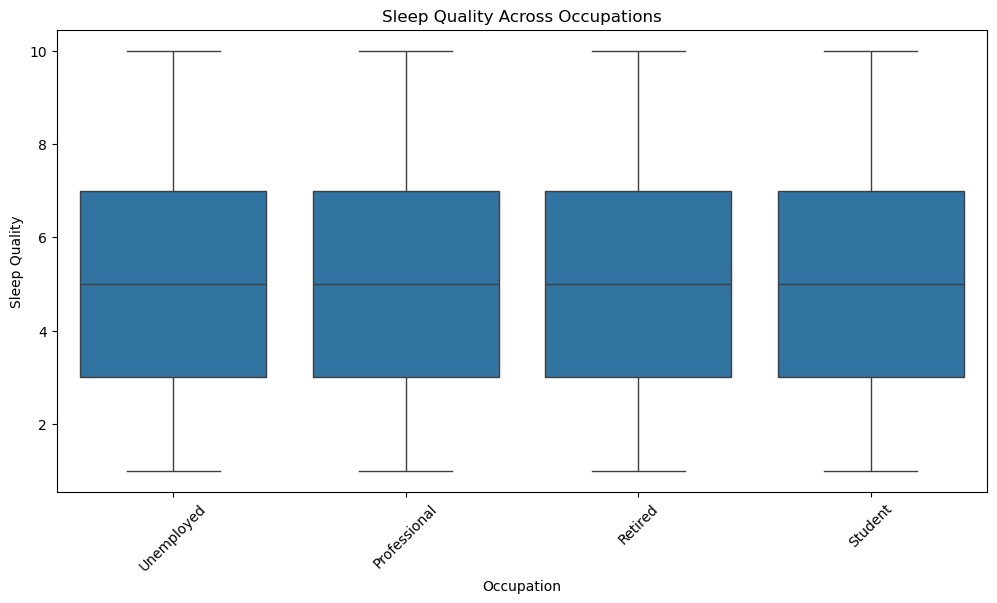

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=X['Occupation'], y=X['Sleep Quality (scale 1-10)'])
plt.title('Sleep Quality Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45)
plt.show()

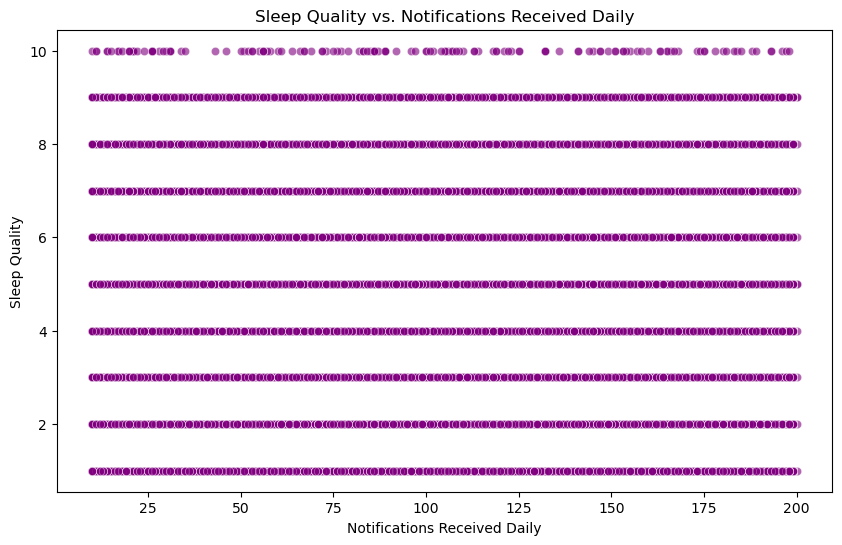

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Notifications Received Daily'], y=X['Sleep Quality (scale 1-10)'], alpha=0.6, color='purple')
plt.title('Sleep Quality vs. Notifications Received Daily')
plt.xlabel('Notifications Received Daily')
plt.ylabel('Sleep Quality')
plt.show()

/var/folders/7l/bxnrg7g12_lc860y8_gj_4_80000gn/T/ipykernel_15085/903778987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=social_media['Social Media Fatigue Level (scale 1-10)'], y=social_media['Sleep Quality (scale 1-10)'], palette='viridis')


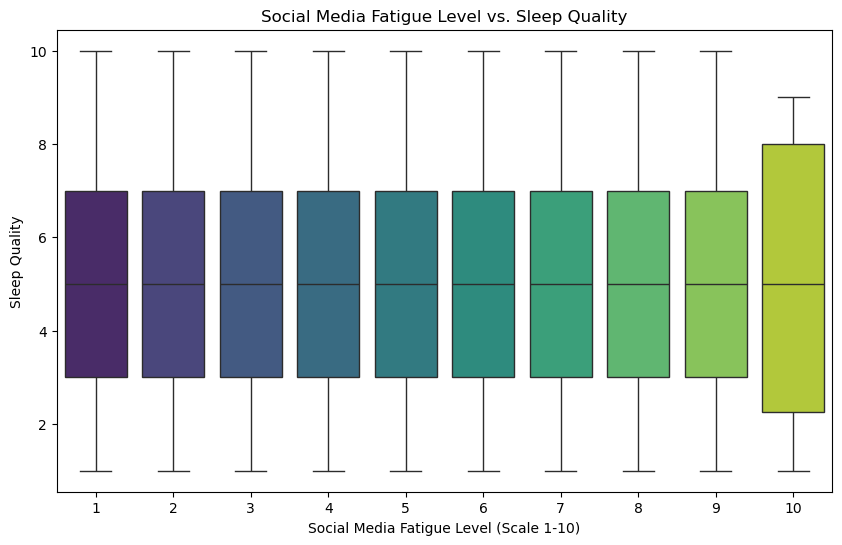

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['Social Media Fatigue Level (scale 1-10)'], y=X['Sleep Quality (scale 1-10)'], palette='viridis')
plt.title('Social Media Fatigue Level vs. Sleep Quality')
plt.xlabel('Social Media Fatigue Level (Scale 1-10)')
plt.ylabel('Sleep Quality')
plt.show()

### Looking for Correlations


In [ ]:
corr_matrix = X.corr(numeric_only=True)

In [ ]:
corr_matrix["Sleep Quality (scale 1-10)"].sort_values(ascending=False)


Sleep Quality (scale 1-10)                    1.000000
Daily Gaming Time (hrs)                       0.003777
Screen Time Proportion                        0.003375
Screen Time (hrs)                             0.002988
Monthly Expenditure on Entertainment (USD)    0.002857
Social Media Fatigue Level (scale 1-10)       0.002096
Total Leisure Time                            0.001910
Social Media Platforms Used                   0.001442
Daily Entertainment Time (hrs)                0.001303
Subscription Platforms                        0.001226
News Consumption Time (hrs)                   0.001180
Ad Interaction Count                          0.001113
Physical Activity Time (hrs)                  0.001029
Work/Study Time (hrs)                         0.000923
Fatigue x Social Media Time                   0.000797
Reading Time (hrs)                            0.000691
Social Isolation Feeling (scale 1-10)         0.000455
Age                                           0.000408
Monthly In

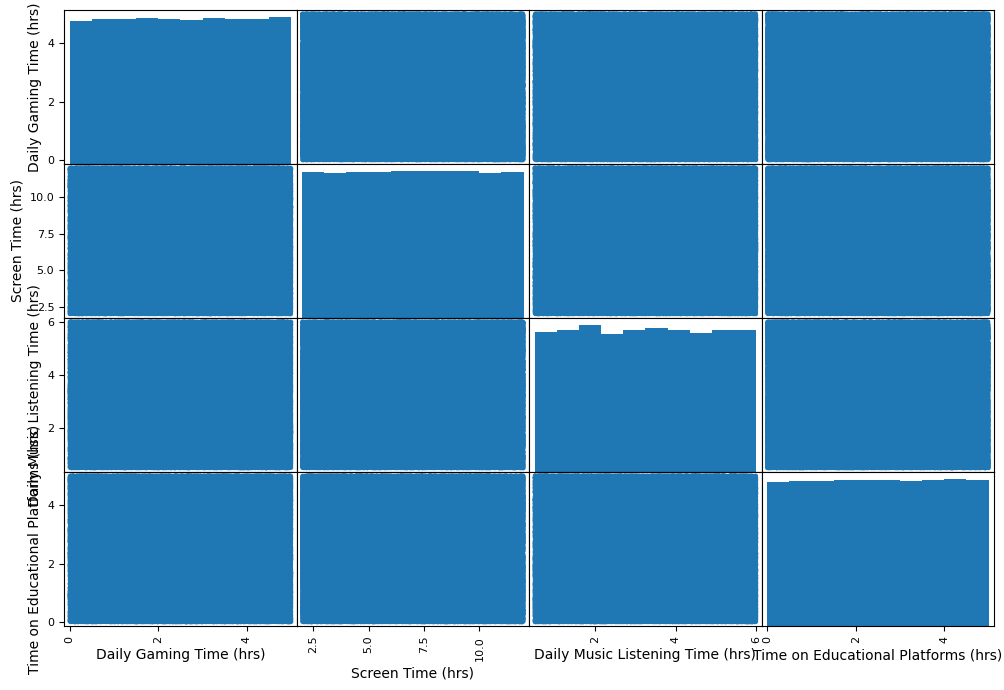

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Daily Gaming Time (hrs)", "Screen Time (hrs)", "Daily Music Listening Time (hrs)",
              "Time on Educational Platforms (hrs)"]
scatter_matrix(X[attributes], figsize=(12, 8))
plt.show()

### Experimenting with Attribute Combinations

In [ ]:
X['Fatigue x Social Media Time'] = X['Social Media Fatigue Level (scale 1-10)'] * X['Daily Social Media Time (hrs)']

X['Notifications x Sleep'] = X['Notifications Received Daily'] * X['Average Sleep Time (hrs)']

X['Total Digital Engagement Time'] = (
    X['Daily Social Media Time (hrs)'] +
    X['Daily Messaging Time (hrs)'] +
    X['Daily Video Content Time (hrs)'] +
    X['Daily Gaming Time (hrs)']
)
X['Screen Time Proportion'] = X['Screen Time (hrs)'] / (X['Total Digital Engagement Time'] + 1)

X['Total Leisure Time'] = (
    X['Daily Entertainment Time (hrs)'] +
    X['Daily Gaming Time (hrs)'] +
    X['Daily Video Content Time (hrs)']
)

X['Leisure vs Productivity Ratio'] = X['Total Leisure Time'] / (X['Work/Study Time (hrs)'] + 1)
X['Notifications per Hour'] = X['Notifications Received Daily'] / (X['Screen Time (hrs)'] + 1)
X['Physical Activity per Screen Hour'] = X['Physical Activity Time (hrs)'] / (X['Screen Time (hrs)'] + 1)

In [ ]:
corr_matrix = X.corr(numeric_only=True)
corr_matrix["Sleep Quality (scale 1-10)"].sort_values(ascending=False)

Sleep Quality (scale 1-10)                    1.000000
Daily Gaming Time (hrs)                       0.003777
Screen Time Proportion                        0.003375
Screen Time (hrs)                             0.002988
Monthly Expenditure on Entertainment (USD)    0.002857
Social Media Fatigue Level (scale 1-10)       0.002096
Total Leisure Time                            0.001910
Social Media Platforms Used                   0.001442
Daily Entertainment Time (hrs)                0.001303
Subscription Platforms                        0.001226
News Consumption Time (hrs)                   0.001180
Ad Interaction Count                          0.001113
Physical Activity Time (hrs)                  0.001029
Work/Study Time (hrs)                         0.000923
Fatigue x Social Media Time                   0.000797
Reading Time (hrs)                            0.000691
Social Isolation Feeling (scale 1-10)         0.000455
Age                                           0.000408
Monthly In

### Prepare the Data for Machine Learning Algorithms

In [ ]:
X = strat_train_set.drop("Sleep Quality (scale 1-10)", axis=1)
X_labels = strat_train_set["Sleep Quality (scale 1-10)"].copy()

In [ ]:
null_rows_idx = X.isnull().any(axis=1)
X.loc[null_rows_idx].head()

,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),Daily Gaming Time (hrs),...,News Consumption Time (hrs),Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)


In [ ]:
import numpy as np
df_num = X.select_dtypes(include=[np.number])

from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df_num)
outlier_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
X = X.iloc[outlier_pred == 1]
X_labels = X_labels.iloc[outlier_pred == 1]

### Handling Text and Categorical Attributes


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_features = X[[
    'Gender','Country', 'Primary Platform', 'Occupation', 'Marital Status',
    'Device Type', 'Preferred Content Type', 'Primary Social Media Goal',
    'Preferred Entertainment Platform', 'Parental Status', 'Preferred Device for Entertainment',
    'Data Plan Used'
]]


ordinal_encoder = OrdinalEncoder()
X_cat_encoded = ordinal_encoder.fit_transform(cat_features)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_num_std_scaled = std_scaler.fit_transform(df_num)

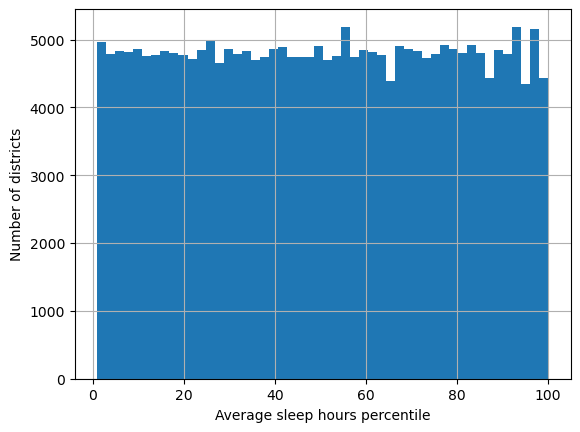

In [ ]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(df_num["Average Sleep Time (hrs)"], p)
               for p in range(1, 100)]
flattened_Sleep_Quality = pd.cut(df_num["Average Sleep Time (hrs)"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_Sleep_Quality.hist(bins=50)
plt.xlabel("Average sleep hours percentile")
plt.ylabel("Number of districts")
plt.show()

## Customer Transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Feature engineering
        X['Fatigue x Social Media Time'] = X['Social Media Fatigue Level (scale 1-10)'] * X['Daily Social Media Time (hrs)']
        X['Notifications x Sleep'] = X['Notifications Received Daily'] * X['Average Sleep Time (hrs)']
        X['Total Digital Engagement Time'] = (
            X['Daily Social Media Time (hrs)'] +
            X['Daily Messaging Time (hrs)'] +
            X['Daily Video Content Time (hrs)'] +
            X['Daily Gaming Time (hrs)']
        )
        X['Screen Time Proportion'] = X['Screen Time (hrs)'] / (X['Total Digital Engagement Time'] + 1)
        X['Total Leisure Time'] = (
            X['Daily Entertainment Time (hrs)'] +
            X['Daily Gaming Time (hrs)'] +
            X['Daily Video Content Time (hrs)']
        )
        X['Leisure vs Productivity Ratio'] = X['Total Leisure Time'] / (X['Work/Study Time (hrs)'] + 1)
        X['Notifications per Hour'] = X['Notifications Received Daily'] / (X['Screen Time (hrs)'] + 1)
        X['Physical Activity per Screen Hour'] = X['Physical Activity Time (hrs)'] / (X['Screen Time (hrs)'] + 1)

        return X

# Transformation Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# Define numeric, categorical, and one-hot features
num_features = [
    'Age', 'Daily Social Media Time (hrs)', 'Daily Entertainment Time (hrs)',
    'Daily Messaging Time (hrs)', 'Daily Video Content Time (hrs)',
    'Daily Gaming Time (hrs)', 'Monthly Income (USD)', 'Internet Speed (Mbps)',
    'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)',
    'Reading Time (hrs)', 'Work/Study Time (hrs)', 'Screen Time (hrs)',
    'Notifications Received Daily', 'Daily Music Listening Time (hrs)', 'News Consumption Time (hrs)',
    'Ad Interaction Count', 'Time on Educational Platforms (hrs)',
    'Monthly Expenditure on Entertainment (USD)'
]
cat_features = [
    'Gender','Country', 'Primary Platform', 'Occupation', 'Marital Status',
    'Device Type', 'Preferred Content Type', 'Primary Social Media Goal',
    'Preferred Entertainment Platform', 'Preferred Device for Entertainment',
    'Data Plan Used'
]
onehot_features = ['Parental Status']

# Numeric Transformer
num_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Categorical Transformer (Ordinal Encoding)
cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)

# One-Hot Encoding Transformer
onehot_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# Combine preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
        ('onehot', onehot_transformer, onehot_features)
    ]
)




In [ ]:
X_prepared = preprocessor.fit_transform(X)

## Select and Train a Model

#### Training and Evaluating on the Training Set


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessor, LinearRegression())
lin_reg.fit(X, X_labels)

X_predictions = lin_reg.predict(X)

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(X_labels, X_predictions,
                              squared=False)
lin_rmse

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.588276844822909

##### Better Evaluation Using Cross-Validation


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, X, X_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()


count    10.000000
mean      3.667570
std       0.035439
min       3.609847
25%       3.650704
50%       3.666020
75%       3.681779
max       3.728971
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Create a pipeline with Random Forest
rf_reg = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(rf_reg, X, X_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()


count    10.000000
mean      2.607975
std       0.018252
min       2.574810
25%       2.596847
50%       2.605202
75%       2.623511
max       2.633397
dtype: float64

# Fine-Tune the Model


#### Grid Search

In [ ]:

from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = [
    {
        'preprocessing__num__standardscaler__with_mean': [True, False],  # Example numeric parameter
        'random_forest__max_features': [4, 6, 8],
        'random_forest__n_estimators': [50, 100, 200]
    },
    {
        'preprocessing__onehot__onehotencoder__handle_unknown': ['ignore'],  # One-hot encoder parameter
        'random_forest__max_depth': [10, 20, None],
        'random_forest__min_samples_split': [2, 5, 10]
    }
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X, X_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Daily '
                                                                          'Social '
                                                                          'Media '
                                                                          'Time '
                                                                          '(hrs)',
                                                                          'Daily '
                                                                          'Entertainment '
                                                                          'Time '
                                                                          '(hrs)',
                                                                          'Daily '
                                                                          'Messaging '
                                                                          'Time '
                                                                          '(hrs)',
                                                                          'Daily '
                                                                          'Video '
                                                                          'Content '
                                                                          'Time '
                                                                          '(hrs...
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__num__standardscaler__with_mean': [True,
                                                                            False],
                          'random_forest__max_features': [4, 6, 8],
                          'random_forest__n_estimators': [50, 100, 200]},
                         {'preprocessing__onehot__onehotencoder__handle_unknown': ['ignore'],
                          'random_forest__max_depth': [10, 20, None],
                          'random_forest__min_samples_split': [2, 5, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_


{'preprocessing__onehot__onehotencoder__handle_unknown': 'ignore',
 'random_forest__max_depth': 10,
 'random_forest__min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Daily Social Media Time '
                                                   '(hrs)',
                                                   'Daily Entertainment Time '
                                                   '(hrs)',
                                                   'Daily Messaging Time (hrs)',
                                                   'Daily Video Content Time '
                                                   '(hrs)',
                                                   'Daily Gaming Time (hrs)',
                                                   'Monthly Income (USD)',
                                                   'In...
                                                   'Primary Social Media Goal',
                                                   'Preferred Entertainment '
                                                   'Platform',
                                                   'Preferred Device for '
                                                   'Entertainment',
                                                   'Data Plan Used']),
                                                 ('onehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental Status'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=10, random_state=42))])

#### Randomized Search


In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__num__standardscaler__with_mean,param_random_forest__max_features,param_random_forest__n_estimators,param_preprocessing__onehot__onehotencoder__handle_unknown,param_random_forest__max_depth,param_random_forest__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,16.257213,0.356610,0.077866,0.003362,NaN,NaN,NaN,ignore,10,2,{'preprocessing__onehot__onehotencoder__handle...,-2.585359,-2.589885,-2.600988,-2.592077,0.006566,1
20,15.927490,0.140993,0.074183,0.001202,NaN,NaN,NaN,ignore,10,10,{'preprocessing__onehot__onehotencoder__handle...,-2.585620,-2.589734,-2.600885,-2.592080,0.006449,2
19,16.257898,0.100331,0.096004,0.030650,NaN,NaN,NaN,ignore,10,5,{'preprocessing__onehot__onehotencoder__handle...,-2.585611,-2.589850,-2.600811,-2.592091,0.006404,3
2,10.732837,0.175332,0.426113,0.002556,True,4,200,NaN,NaN,NaN,{'preprocessing__num__standardscaler__with_mea...,-2.592003,-2.596169,-2.609014,-2.599062,0.007240,4
11,10.882988,0.165609,0.425011,0.004348,False,4,200,NaN,NaN,NaN,{'preprocessing__num__standardscaler__with_mea...,-2.592089,-2.596208,-2.608926,-2.599074,0.007166,5


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'random_forest__max_features': randint(low=2, high=20),  # Random Forest max_features
    'random_forest__n_estimators': randint(low=50, high=200)  # Random Forest n_estimators
}
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X, X_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Daily '
                                                                                'Social '
                                                                                'Media '
                                                                                'Time '
                                                                                '(hrs)',
                                                                                'Daily '
                                                                                'Entertainment '
                                                                                'Time '
                                                                                '(hrs)',
                                                                                'Daily '
                                                                                'Messaging '
                                                                                'Time '
                                                                                '(hrs)',
                                                                                'Daily '
                                                                                'Video '
                                                                                'Content '
                                                                                'Time...
                                                                                'Status'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1484c2930>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1486965d0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,10.792475,0.122791,0.426915,0.001821,4,199,"{'random_forest__max_features': 4, 'random_for...",-2.591941,-2.596232,-2.608910,-2.599027,0.007204,1
3,17.073381,0.027321,0.356706,0.001718,8,171,"{'random_forest__max_features': 8, 'random_for...",-2.593813,-2.595776,-2.611339,-2.600309,0.007840,2
1,29.983030,0.577069,0.317892,0.003586,16,156,"{'random_forest__max_features': 16, 'random_fo...",-2.594492,-2.601324,-2.607240,-2.601019,0.005209,3
7,5.683008,0.027675,0.302822,0.002878,3,137,"{'random_forest__max_features': 3, 'random_for...",-2.594158,-2.600999,-2.609332,-2.601496,0.006205,4
0,14.113464,0.204967,0.294241,0.002158,8,142,"{'random_forest__max_features': 8, 'random_for...",-2.596140,-2.596170,-2.613943,-2.602084,0.008386,5


# Analyze the Best Models and Their Errors


In [ ]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.04, 0.05, 0.05, 0.04, 0.04, 0.04, 0.05, 0.05, 0.04, 0.04, 0.04,
       0.05, 0.05, 0.04, 0.05, 0.04, 0.04, 0.04, 0.05, 0.02, 0.02, 0.02,
       0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01])

In [ ]:

sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.046283766210107005, 'num__Monthly Expenditure on Entertainment (USD)'),
 (0.046038805026699256, 'num__Monthly Income (USD)'),
 (0.04541580695873233, 'num__Internet Speed (Mbps)'),
 (0.04532608469292688, 'num__Work/Study Time (hrs)'),
 (0.04514168663803777, 'num__Daily Social Media Time (hrs)'),
 (0.045092797147709585, 'num__Daily Music Listening Time (hrs)'),
 (0.0450608019341095, 'num__Screen Time (hrs)'),
 (0.04501433371399387, 'num__Daily Entertainment Time (hrs)'),
 (0.04496839667725916, 'num__Daily Messaging Time (hrs)'),
 (0.04489976827281007, 'num__Daily Video Content Time (hrs)'),
 (0.04484680177229836, 'num__Average Sleep Time (hrs)'),
 (0.044618293277789864, 'num__Reading Time (hrs)'),
 (0.04459040787715883, 'num__Time on Educational Platforms (hrs)'),
 (0.044444740103246505, 'num__Daily Gaming Time (hrs)'),
 (0.043780064336369065, 'num__News Consumption Time (hrs)'),
 (0.043671298906282505, 'num__Physical Activity Time (hrs)'),
 (0.042813524919686805, 'num__Notifications

# Evaluate Your System on the Test Set


In [ ]:
X_test = strat_test_set.drop("Sleep Quality (scale 1-10)", axis=1)
y_test = strat_test_set["Sleep Quality (scale 1-10)"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)


2.5880252009748905


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.57878061, 2.59723689])

# Model persistence using joblib


In [ ]:
import joblib

joblib.dump(final_model, "my_X_model.pkl")

['my_social_media_model.pkl']

#### Simulating deploying into production

In [ ]:
final_model_reloaded = joblib.load("my_X_model.pkl")

new_data = X.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

predictions

array([6.35678392, 2.49748744, 6.35175879, 3.13567839, 6.92462312])

# Casual Inference

In [158]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from causalml.inference.meta import (
    LRSRegressor, XGBTRegressor,
    BaseTRegressor, BaseXRegressor, BaseRRegressor,XGBTRegressor
)
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from causalml.match import NearestNeighborMatch
from causalml.propensity import ElasticNetPropensityModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
# (Optional) For computing propensity scores if you want to pass them into some learners
from causalml.propensity import ElasticNetPropensityModel

In [188]:
#Preprocessing
import pandas as pd
# Read in the dataset (adjust the path as necessary)
social_media = pd.read_csv("social_media_entertainment_data.csv")

# Drop identifier column
social_media = social_media.drop(columns=['User ID'])

# Create a new feature for total digital engagement time by summing several columns
social_media['Total Digital Engagement Time'] = (
    social_media['Daily Social Media Time (hrs)'] +
    social_media['Daily Messaging Time (hrs)'] +
    social_media['Daily Video Content Time (hrs)'] +
    social_media['Daily Gaming Time (hrs)'])

# Drop the original time columns as they are now summarized, and columns that based on surveyee's feelings, also some columns that are highly correlated with the treatment column. 
social_media = social_media.drop(columns=[
    'Daily Social Media Time (hrs)',
    'Daily Messaging Time (hrs)',
    'Daily Video Content Time (hrs)',
    'Daily Gaming Time (hrs)','Screen Time (hrs)',
    'Social Media Fatigue Level (scale 1-10)',
    'Tech Savviness Level (scale 1-10)',
    'Social Isolation Feeling (scale 1-10)',
    'Screen Time (hrs)','Time Spent in Online Communities (hrs)',
    'Digital Well-being Awareness','Data Plan Used',
    'Primary Social Media Goal',
    'Social Media Platforms Used',
    'Preferred Entertainment Platform'
])

In [ ]:
# Convert Total Digital Engagement Time into a binary treatment indicator:
# 1 = High engagement (greater than threshold), 0 = Low engagement.
threshold = 6
social_media["Treatment"] = (social_media["Total Digital Engagement Time"] > threshold).astype(int)

Setting the threshold of 6 hours is based on research from the American Psychological Association (APA), which highlights that teens spend nearly 6 hours daily on social media. This threshold serves as a benchmark for distinguishing between high and low digital engagement levels

In [189]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = social_media[social_media["Treatment"] == 1]
df_minority = social_media[social_media["Treatment"] == 0]

# Downsample majority class to match minority class size
df_majority_downsampled = resample(df_majority,
                                   replace=False,  
                                   n_samples=len(df_minority),  
                                   random_state=42)  

social_media_balanced = pd.concat([df_majority_downsampled, df_minority])

social_media_balanced = social_media_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new treatment distribution
print("Balanced Treatment Distribution:")
print(social_media_balanced["Treatment"].value_counts())


Balanced Treatment Distribution:
Treatment
1    5646
0    5646
Name: count, dtype: int64


In [190]:
# Define the outcome variable and feature set
y = social_media_balanced["Sleep Quality (scale 1-10)"]
treatment = social_media_balanced["Treatment"]
X = social_media_balanced.drop(columns=["Sleep Quality (scale 1-10)", "Total Digital Engagement Time", "Treatment"])


In [191]:



# Define numeric, categorical, and one-hot features
num_features = [
    'Age'
    , 'Monthly Income (USD)', 'Internet Speed (Mbps)',
    'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)',
    'Reading Time (hrs)', 'Work/Study Time (hrs)',
     'Daily Music Listening Time (hrs)', 
    'Monthly Expenditure on Entertainment (USD)','News Consumption Time (hrs)',
    'Ad Interaction Count', 'Time on Educational Platforms (hrs)'
]
cat_features = [
    'Gender','Country', 'Primary Platform', 'Occupation', 'Marital Status',
 'Preferred Content Type', 
    'Preferred Device for Entertainment','Notifications Received Daily','Device Type',
    'Subscription Platforms',
]
onehot_features = ['Parental Status']

# Preprocessing Numeric Features 
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

#  Preprocessing Categorical Features (Ordinal Encoding) 
ordinal_encoder = OrdinalEncoder()
X[cat_features] = ordinal_encoder.fit_transform(X[cat_features])

#  Preprocessing One-Hot Encoded Features 
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(X[onehot_features])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_features),
                                 index=X.index)

# Remove the original one-hot columns and add the one-hot encoded ones
X = X.drop(columns=onehot_features)
X = pd.concat([X, onehot_encoded_df], axis=1)

# Check the processed data
print("Encoded Social Media Dataset:")
print(X.head())


print("Encoded Social Media Dataset:")
print(X.head())


Encoded Social Media Dataset:
        Age  Gender  Country  Daily Entertainment Time (hrs)  \
0 -0.825955     1.0      0.0                            7.45   
1  0.908708     2.0      2.0                            7.87   
2  0.108094     0.0      4.0                            7.34   
3  0.775273     2.0      4.0                            7.84   
4  0.241530     2.0      2.0                            5.84   

   Primary Platform  Occupation  Marital Status  Monthly Income (USD)  \
0               4.0         3.0             1.0             -1.612652   
1               4.0         0.0             3.0             -0.331654   
2               0.0         0.0             0.0              1.317560   
3               3.0         0.0             3.0              0.754712   
4               3.0         1.0             2.0             -0.878726   

   Device Type  Internet Speed (Mbps)  ...  Notifications Received Daily  \
0          0.0               1.069200  ...                          37

In [192]:
print(X.columns)

Index(['Age', 'Gender', 'Country', 'Daily Entertainment Time (hrs)',
       'Primary Platform', 'Occupation', 'Marital Status',
       'Monthly Income (USD)', 'Device Type', 'Internet Speed (Mbps)',
       'Subscription Platforms', 'Average Sleep Time (hrs)',
       'Physical Activity Time (hrs)', 'Reading Time (hrs)',
       'Work/Study Time (hrs)', 'Notifications Received Daily',
       'Daily Music Listening Time (hrs)', 'Preferred Content Type',
       'News Consumption Time (hrs)', 'Ad Interaction Count',
       'Time on Educational Platforms (hrs)',
       'Preferred Device for Entertainment',
       'Monthly Expenditure on Entertainment (USD)', 'Parental Status_No',
       'Parental Status_Yes'],
      dtype='object')


In [193]:
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, treatment, y, test_size=0.2, random_state=42)

### Calculate Average Treatment Effect (ATE)

In [134]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [173]:
learner_s = LRSRegressor()
learner_s.fit(X_train, T_train, y_train)
ate_s = learner_s.estimate_ate(X=X_test, treatment=T_test, y=y_test)
print("S-Learner ATE Estimate:", ate_s)

S-Learner ATE Estimate: (array([-0.1110599]), array([-0.32591962]), array([0.10379981]))


The S-Learner ATE estimate of -0.1111 suggests a slight negative impact of Total Digital Engagement Time on Sleep Quality, but the confidence interval crosses zero, indicating the effect is not statistically significant. This means digital engagement might reduce sleep quality, but the evidence is inconclusive. The S-Learner’s single-model approach may oversimplify the relationship.

In [174]:
learner_t = XGBTRegressor()
learner_t.fit(X_train, T_train, y_train)
ate_t = learner_t.estimate_ate(X=X_test, treatment=T_test, y=y_test)
print("T-Learner ATE Estimate:", ate_t)

# Using BaseTRegressor with XGB
learner_t_xgb = BaseTRegressor(learner=XGBRegressor())
ate_t_xgb = learner_t_xgb.estimate_ate(X=X_test, treatment=T_test, y=y_test)
print("T-Learner ATE Estimate (BaseTRegressor with XGB):", ate_t_xgb)

# Using BaseTRegressor with XGB
learner_t_linear = BaseTRegressor(learner=LinearRegression())
ate_t_linear = learner_t_linear.estimate_ate(X=X_test, treatment=T_test, y=y_test)
print("T-Learner ATE Estimate (BaseTRegressor with linear):", ate_t_linear)

T-Learner ATE Estimate: (array([-0.14999508]), array([-0.26607663]), array([-0.03391353]))
T-Learner ATE Estimate (BaseTRegressor with XGB): (array([-0.14999508]), array([-0.26607663]), array([-0.03391353]))
T-Learner ATE Estimate (BaseTRegressor with linear): (array([-0.1134204]), array([-0.32491614]), array([0.09807535]))


The T-Learner ATE estimates also suggest a small negative effect of Total Digital Engagement Time on Sleep Quality, with values around -0.15 for both the XGBoost-based models. The confidence intervals (-0.2661, -0.0339) indicate statistical significance, implying that higher digital engagement may indeed reduce sleep quality. However, the BaseTRegressor with Linear Regression produces a slightly weaker effect (-0.1134) with a wider confidence interval. The more flexible XGBoost model seems to provide a more consistent and statistically significant estimate of the negative impact.

In [177]:
from sklearn.linear_model import LogisticRegression

# Step 1: Train a logistic regression model on the training set
propensity_model = LogisticRegression()

# Fit the model using training data
propensity_model.fit(X_train, T_train)

# Step 2: Predict propensity scores for both training and test sets
prop_scores_train = propensity_model.predict_proba(X_train)[:, 1]  
e = propensity_model.predict_proba(X_test)[:, 1]   

# Print shape to verify
print("Propensity Scores (Train) Shape:", prop_scores_train.shape)  # Should match X_train
print("Propensity Scores (Test) Shape:", e.shape)    # Should match X_test

Propensity Scores (Train) Shape: (9033,)
Propensity Scores (Test) Shape: (2259,)


In [142]:
# Ensure all variables have correct shape before passing to R-Learner
print("X_test Shape:", X_test.shape)  
print("T_test Shape:", T_test.shape)  
print("y_test Shape:", y_test.shape) 
print("e Shape (Propensity Score):", e.shape)  

X_test Shape: (9034, 25)
T_test Shape: (9034,)
y_test Shape: (9034,)
e Shape (Propensity Score): (9034,)


In [178]:
# X Learner with propensity score input
x_learner = BaseXRegressor(learner=XGBRegressor())
x_learner.fit(X_train, T_train, y_train)
ate_x = x_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)
print('Using the BaseXRegressor class and using XGB:')
print(ate_x)


# X Learner with propensity score input
x_learner = BaseXRegressor(learner=LinearRegression())
ate_x = x_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)
print('\nUsing the BaseXRegressor class and using Linear Regression:')
print(ate_x)


Using the BaseXRegressor class and using XGB:
(array([-0.13256215]), array([-0.2032992]), array([-0.06182511]))

Using the BaseXRegressor class and using Linear Regression:
(array([-0.1134204]), array([-0.32491614]), array([0.09807535]))


The X-Learner ATE estimates continue to indicate a negative treatment effect, suggesting that higher digital engagement slightly reduces sleep quality. The XGBoost model estimates an ATE of -0.1326 with a confidence interval of (-0.2033, -0.0618), reinforcing statistical significance. Meanwhile, the Linear Regression-based X-Learner produces a slightly smaller effect with a wider confidence interval, implying more variability and potential uncertainty. 

In [179]:

# X Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
x_learner = BaseXRegressor(learner=XGBRegressor())
ate_x = x_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)

# X Learner without propensity score input
# Calling the Base Learner class and feeding in Linearregression
x_learner = BaseXRegressor(learner=LinearRegression())
ate_x = x_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)

Using the BaseXRegressor class and using XGB without propensity score input:
(array([-0.13893204]), array([-0.2094145]), array([-0.06844958]))
Using the BaseXRegressor class and using XGB without propensity score input:
(array([-0.1134204]), array([-0.32491614]), array([0.09807535]))


The X-Learner ATE estimates without propensity score input indicate a negative treatment effect. The XGBoost-based X-Learner produces an ATE of -0.1389 with a confidence interval of (-0.2094, -0.0684), suggesting a statistically significant effect. In contrast, the Linear Regression-based X-Learner yields an ATE of -0.1134

In [180]:
# R Learner with propensity score input
# Calling the Base Learner class and feeding in XGB
r_learner = BaseRRegressor(learner=XGBRegressor())
r_learner.fit(X_train, T_train, y_train)
ate_r = r_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)
print("R-Learner ATE Estimate:", ate_r)

# Calling the Base Learner class and feeding in LinearRegression
r_learner = BaseRRegressor(learner=LinearRegression())
r_learner.fit(X_train, T_train, y_train)
ate_r = r_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)
print('Using the BaseRRegressor class and using Linear Regression:')
print(ate_r)

# R Learner with propensity score input and random sample weight
# Calling the Base Learner class and feeding in XGB
r_learner = BaseRRegressor(learner=XGBRegressor())
sample_weight = np.random.randint(1, 3, len(y))
ate_r = r_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)
print('Using the BaseRRegressor class and using XGB:')
print(ate_r)

R-Learner ATE Estimate: (array([-0.14811166]), array([-0.15469884]), array([-0.14152449]))
Using the BaseRRegressor class and using Linear Regression:
(array([-0.10195158]), array([-0.10648733]), array([-0.09741584]))
Using the BaseRRegressor class and using XGB:
(array([-0.09829953]), array([-0.10483571]), array([-0.09176335]))


The R-Learner ATE estimates suggest a negative treatment effect, implying that increased digital engagement negatively impacts sleep quality. The XGBoost-based R-Learner produces an ATE of -0.1481 with a narrow confidence interval, indicating a relatively stable estimate. The Linear Regression-based R-Learner results in a slightly less negative ATE of -0.1019, but still within a similar confidence range. When incorporating random sample weights, the XGBoost-based R-Learner yields an ATE of -0.0983, suggesting a smaller but still negative impact. These results consistently indicate that digital engagement time reduces sleep quality, with XGBoost showing more pronounced effects compared to Linear Regression.

In [183]:
# R Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
r_learner = BaseRRegressor(learner=XGBRegressor())
ate_r = r_learner.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using XGB without propensity score input:')
print(ate_r)

# Calling the Base Learner class and feeding in LinearRegression
r_learner = BaseRRegressor(learner=LinearRegression())
ate_r = r_learner.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using Linear Regression without propensity score input:')
print(ate_r)

Using the BaseRRegressor class and using XGB without propensity score input:
(array([-0.0432526]), array([-0.04436216]), array([-0.04214304]))
Using the BaseRRegressor class and using Linear Regression without propensity score input:
(array([-0.0246721]), array([-0.02556658]), array([-0.02377762]))


The results compare the R-Learner estimates using XGBoost and Linear Regression, both without propensity score input.
R-Learner with XGBoost: The ATE estimate is -0.0433, with a confidence interval ranging from -0.0444 to -0.0421. This negative estimate suggests a small but consistent adverse effect of digital engagement on the sleep quality.
R-Learner with Linear Regression: The ATE estimate is -0.0247, with a confidence interval between -0.0256 and -0.0238. The magnitude of the effect is smaller compared to the XGBoost model, but it remains negative.

Both models suggest that digital engagement has a slight negative effect on the outcome. The XGBoost model predicts a stronger negative effect than Linear Regression, likely due to its ability to capture nonlinear relationships.

In [184]:

learner_s = LRSRegressor()
learner_s.fit(X_train, T_train, y_train)
ate_s = learner_s.estimate_ate(X=X_test, treatment=T_test, y=y_test)

x_learner = BaseXRegressor(learner=XGBRegressor())
x_learner.fit(X_train, T_train, y_train)
ate_x = x_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)

learner_t = XGBTRegressor()
learner_t.fit(X_train, T_train, y_train)
ate_t = learner_t.estimate_ate(X=X_test, treatment=T_test, y=y_test)


r_learner = BaseRRegressor(learner=XGBRegressor())
r_learner.fit(X_train, T_train, y_train)
ate_r = r_learner.estimate_ate(X=X_test, treatment=T_test, y=y_test, p=e)

validation_summary = pd.DataFrame({
    "Learner": ["S-Learner (LR)", "T-Learner (XGB)", "X-Learner (XGB)", "R-Learner (XGB)"],
    "ATE Estimate": [ate_s[0], ate_t[0], ate_x[0], ate_r[0]],
    "Lower Bound":  [ate_s[1], ate_t[1], ate_x[1], ate_r[1]],
    "Upper Bound":  [ate_s[2], ate_t[2], ate_x[2], ate_r[2]]
})

print(validation_summary)

           Learner            ATE Estimate             Lower Bound  \
0   S-Learner (LR)  [-0.11105990458587109]  [-0.32591962040549366]   
1  T-Learner (XGB)  [-0.14999507992285552]    [-0.266076629249807]   
2  X-Learner (XGB)  [-0.13256215330154292]   [-0.2032991997418413]   
3  R-Learner (XGB)  [-0.09264616183722214]  [-0.09930704718466361]   

               Upper Bound  
0    [0.10379981123375148]  
1  [-0.033913530595904004]  
2   [-0.06182510686124455]  
3   [-0.08598527648978067]  


 From the validation summary, the meta-learners consistently estimate a negative treatment effect, suggesting that high social media engagement may reduce the  sleeping quality. The T-Learner (-0.150) and X-Learner (-0.133) show a stronger negative effect, while the S-Learner (-0.111) and R-Learner (-0.093) suggest a more moderate impact. The R-Learner provides the most stable estimate with the narrowest confidence interval, while the S-Learner has the widest, indicating higher uncertainty.

### Calculate Individual Treatment Effect (ITE/CATE

In [182]:

cate_s = learner_s.fit_predict(X=X_test, treatment=T_test, y=y_test)
cate_t = learner_t.fit_predict(X=X_test, treatment=T_test, y=y_test)

# X Learner with propensity score input
x_learner = BaseXRegressor(learner=XGBRegressor())
cate_x = x_learner.fit_predict(X=X_test, treatment=T_test, y=y_test, p=e)

# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X_test, treatment=T_test, y=y_test)

# R Learner with propensity score input
r_learner = BaseRRegressor(learner=XGBRegressor())
cate_r = r_learner.fit_predict(X=X_test, treatment=T_test, y=y_test, p=e)

# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X_test, treatment=T_test, y=y_test)


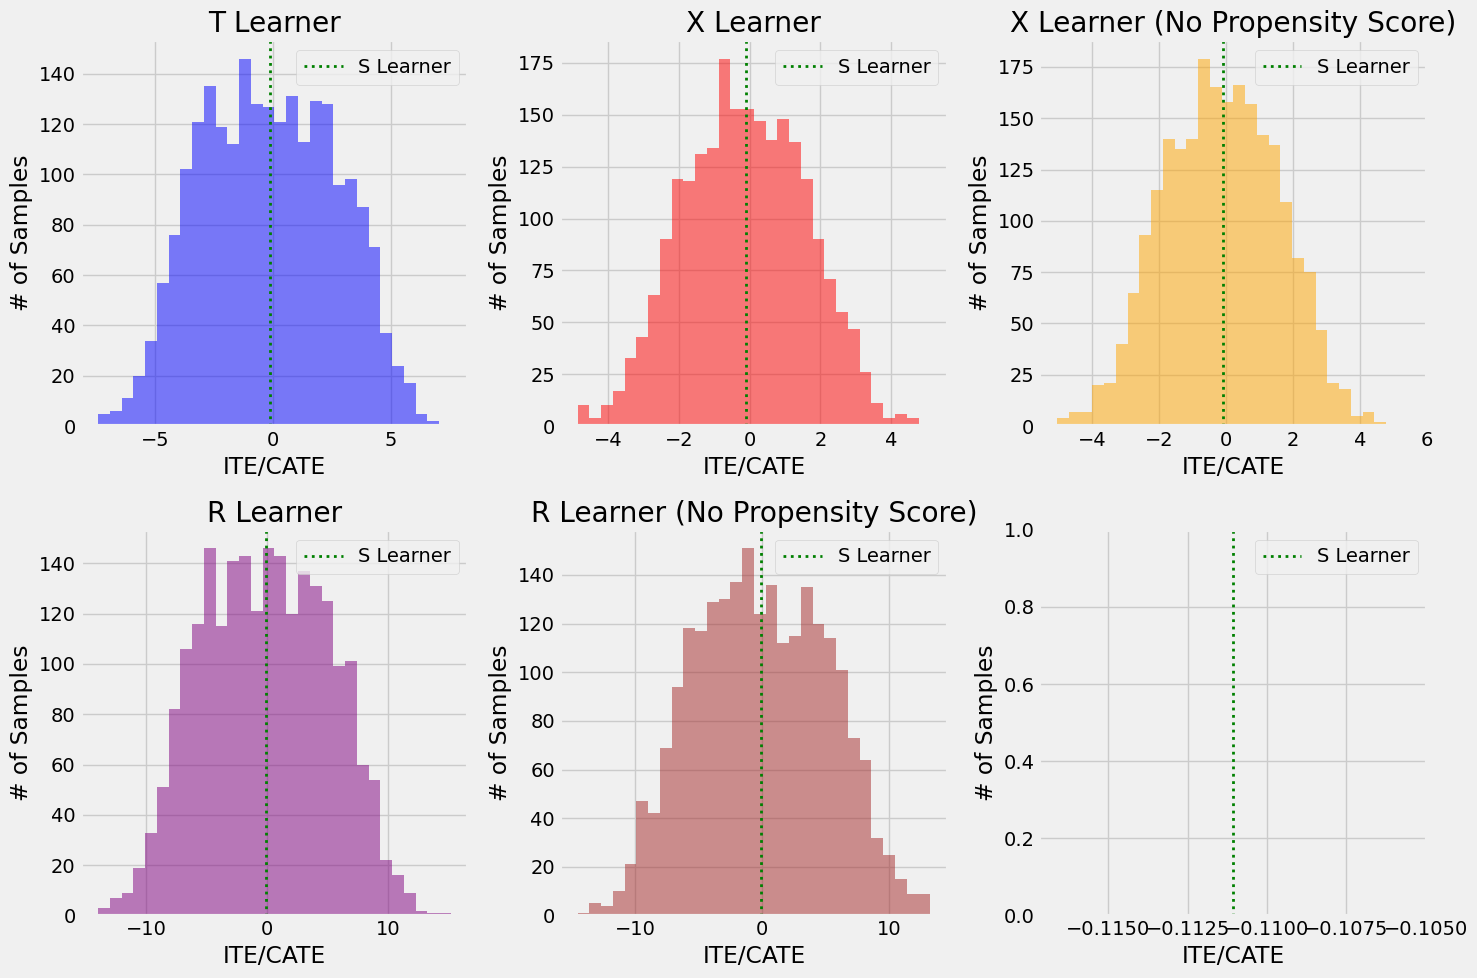

In [185]:
import matplotlib.pyplot as plt

# Histogram settings
alpha = 0.5 
bins = 30  
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 

axes[0, 0].hist(cate_t, alpha=alpha, bins=bins, color='blue')
axes[0, 0].set_title('T Learner')

axes[0, 1].hist(cate_x, alpha=alpha, bins=bins, color='red')
axes[0, 1].set_title('X Learner')

axes[0, 2].hist(cate_x_no_p, alpha=alpha, bins=bins, color='orange')
axes[0, 2].set_title('X Learner (No Propensity Score)')

axes[1, 0].hist(cate_r, alpha=alpha, bins=bins, color='purple')
axes[1, 0].set_title('R Learner')

axes[1, 1].hist(cate_r_no_p, alpha=alpha, bins=bins, color='brown')
axes[1, 1].set_title('R Learner (No Propensity Score)')

# S-Learner as a vertical line on each plot
for ax in axes.flatten():
    ax.axvline(cate_s[0], color='green', linestyle='dotted', linewidth=2, label='S Learner')

# Formatting
for ax in axes.flatten():
    ax.set_xlabel('ITE/CATE')
    ax.set_ylabel('# of Samples')
    ax.legend()

plt.tight_layout()  # Adjust layout
plt.show()

The histograms represent the distribution of Conditional Average Treatment Effects estimated using different meta-learners of T-Learner, X-Learner, and R-Learner, with and without propensity score adjustment. The distributions are centered around zero, indicating that the estimated impact of the treatment on sleep quality is relatively small. The X-Learner and R-Learner, especially when using propensity scores, exhibit more refined distributions, suggesting that accounting for confounders helps reduce bias in causal inference.

For sleep quality, these results imply that digital engagement (the treatment) may not have a strong or consistent causal effect, as the individual treatment effects are relatively symmetrically distributed with no substantial deviation from zero. This suggests that external factors, beyond digital engagement, might play a more significant role in influencing sleep quality. 

## Features Importance

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3117
[LightGBM] [Info] Number of data points in the train set: 9033, number of used features: 26
[LightGBM] [Info] Start training from score 4.994243
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no mo

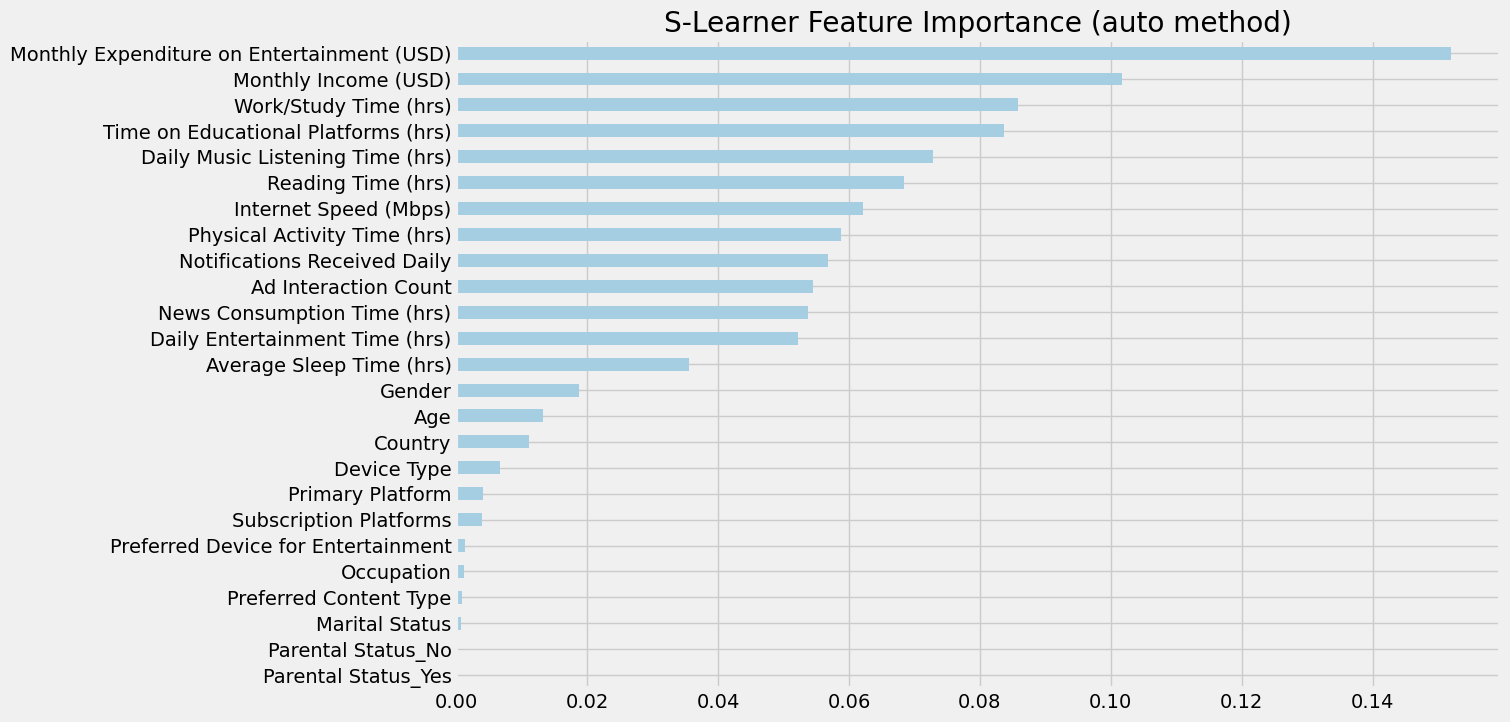

In [200]:


# --- Convert Numeric Treatment to String Labels for S-Learner ---
w_multi_train = np.array(['treatment' if t == 1 else 'control' for t in T_train])
w_multi_test  = np.array(['treatment' if t == 1 else 'control' for t in T_test])

# --- Define Feature Names ---
feature_names = X_train.columns.tolist()

# --- Fit the S-Learner on the Training Set ---
base_algo = LGBMRegressor(importance_type='gain')
slearner = BaseSRegressor(base_algo, control_name='control')
e_multi = {'treatment_A': e}

# Fit the S-Learner and predict individual treatment effects on the training set.
slearner_tau_train = slearner.fit_predict(X_train, w_multi_train, y_train)
    
# --- Feature Importance using the "auto" Method ---
imp_auto = slearner.get_importance(
    X=X_train,
    tau=slearner_tau_train,
    normalize=True,
    method='auto',
    features=feature_names
)
print("S-Learner Feature Importance (auto method):")
print(imp_auto)

# Plot the "auto" feature importances.
slearner.plot_importance(
    X=X_train,
    tau=slearner_tau_train,
    normalize=True,
    method='auto',
    features=feature_names
)
plt.title("S-Learner Feature Importance (auto method)")
plt.show()


The feature importance plot from the S-Learner highlights which variables most strongly influence the treatment effect estimation. 

Monthly Income (USD) and Monthly Expenditure on Entertainment (USD) are the most critical features, suggesting that This suggests that individuals with higher disposable income are having more flexibilityh to choose whether engaging in prolonged social media use, possibly due to increased access to premium content, better internet services, or a digital lifestyle.

Work/Study Time (hrs) ranks third, indicating that prolonged social media usage likely affects academic or professional productivity. Time on Educational Platforms (hrs) is also significant, showing that social media consumption may correlate with digital learning habits. Daily Music Listening Time (hrs) and Reading Time (hrs) suggest that entertainment preferences are shaped by social media behavior. Internet Speed (Mbps) seems also relevant because individuals with high-speed internet could be more likely to engage in extensive online activities, including social media usage.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

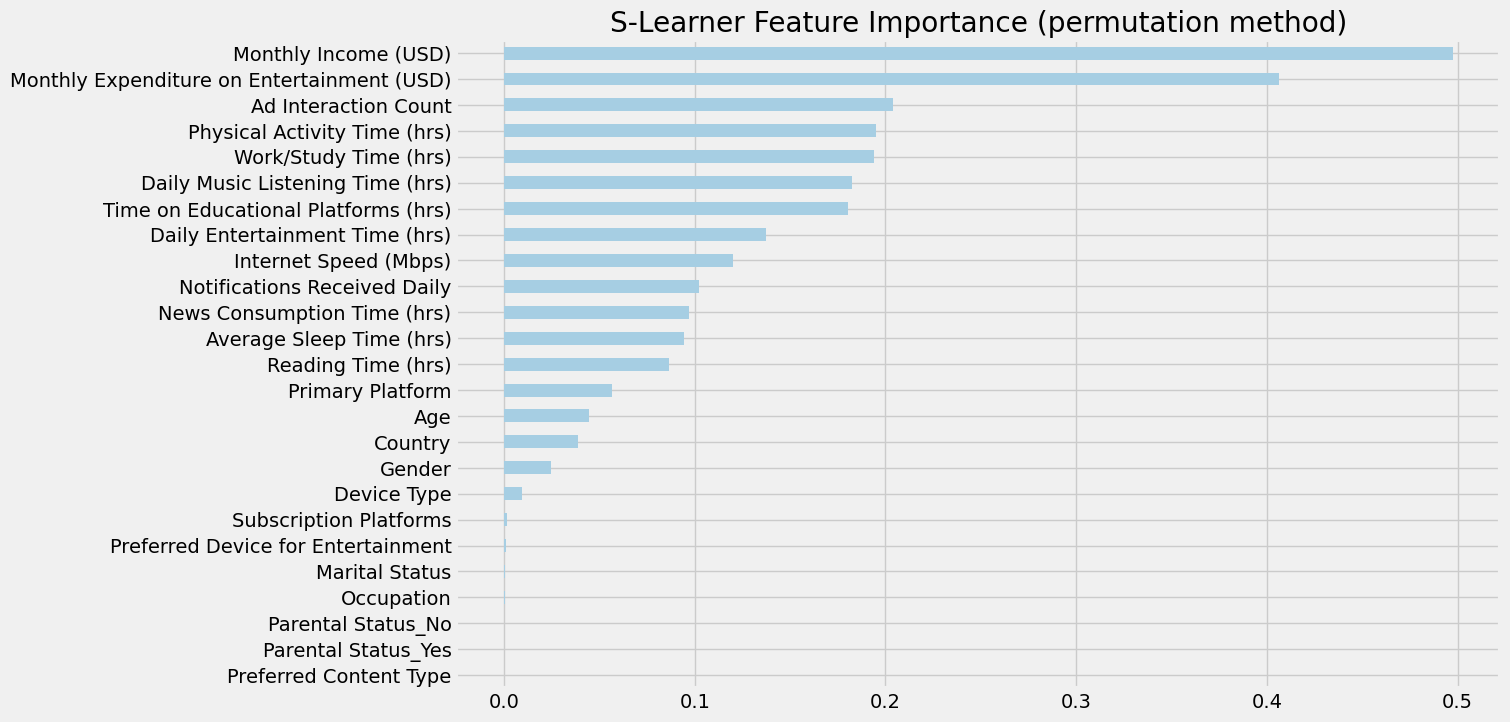

In [199]:
# --- Feature Importance using the Permutation Method ---
imp_perm = slearner.get_importance(
    X=X_train,
    tau=slearner_tau_train,
    method='permutation',
    features=feature_names,
    random_state=42
)
print("\nS-Learner Feature Importance (permutation method):")
print(imp_perm)

# Plot the permutation feature importances.
slearner.plot_importance(
    X=X_train,
    tau=slearner_tau_train,
    method='permutation',
    features=feature_names,
    random_state=42
)
plt.title("S-Learner Feature Importance (permutation method)")
plt.show()

The feature importance plot using the permutation method reveals a similar ranking of variables influencing the treatment effect compared to the previous method. However, Ad Interaction Count ranks third this time, reinforcing the idea that social media exposure increases engagement with advertisements, which could lead to higher entertainment-related expenditures.

Other notable features include Physical Activity Time (hrs), and Work/Study Time (hrs), suggesting that individuals balancing structured activities (such as exercise or work) may be less prone to excessive social media use. Interestingly, Daily Music Listening Time, Time on Educational Platforms, and Daily Entertainment Time also hold moderate importance, reinforcing that digital consumption habits influence the treatment effect.

Average Sleep Time (hrs) appears lower on the list but is still relevant, suggesting that while sleep is a contributing factor, financial and engagement-related behaviors have a stronger impact on the treatment effect. From a causal inference perspective, this highlights that interventions targeting financial habits and digital consumption patterns might be more effective in influencing outcomes related to sleep quality or well-being rather than focusing solely on sleep duration.

In [196]:
# --- SHAP Values ---
# Compute SHAP values using the fitted S-Learner.
shap_values = slearner.get_shap_values(X=X_train, tau=slearner_tau_train)
np.mean(np.abs(shap_values['treatment']),axis=0)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

array([1.74972793e-03, 7.30047821e-04, 1.36992981e-03, 2.92401528e-03,
       8.79111515e-04, 1.40395736e-04, 6.96067140e-05, 1.17766254e-02,
       4.31318634e-04, 3.52613162e-03, 2.03305486e-04, 2.36141032e-03,
       5.64467287e-03, 2.85980671e-03, 4.31626968e-03, 2.79502564e-03,
       3.05396408e-03, 1.27648476e-04, 3.25819186e-03, 4.43060345e-03,
       5.36365665e-03, 1.32480584e-04, 9.98341473e-03, 1.44967634e-05,
       0.00000000e+00])

 The SHAP values are relatively small, implying that while certain variables influence the model’s predictions, no single feature overwhelmingly dominates. This aligns with the earlier findings that digital engagement and lifestyle habits collectively shape the treatment effects rather than being driven by a single factor.

From a causal inference perspective, the SHAP results reinforce that sleep quality outcomes are likely driven by a combination of behavioral, economic, and digital consumption patterns. 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

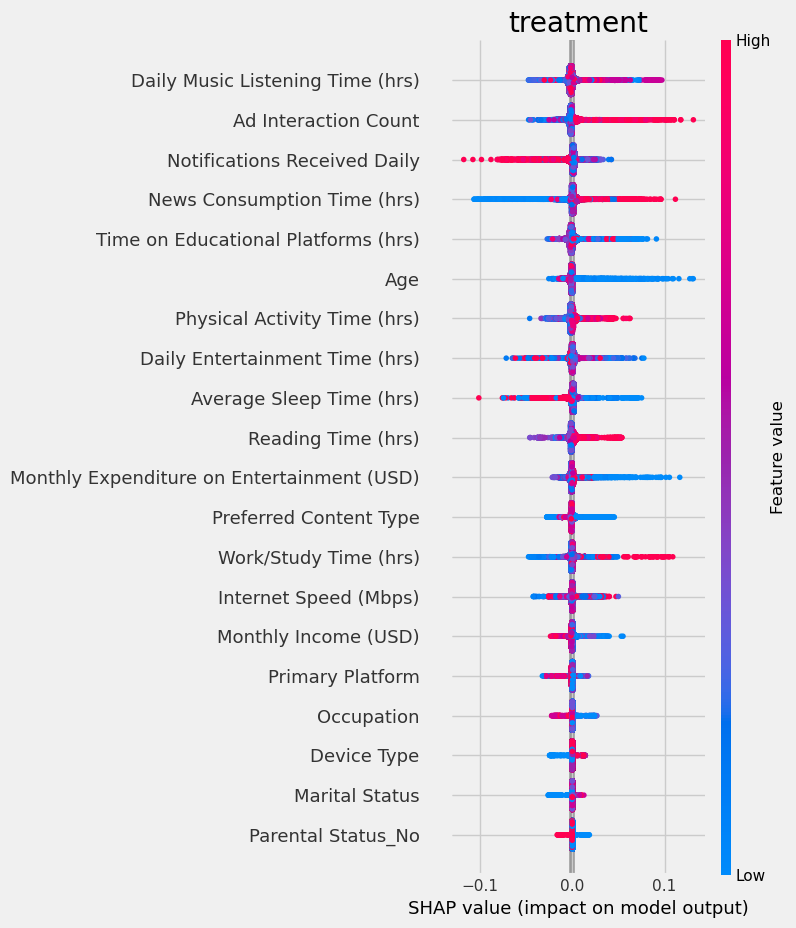

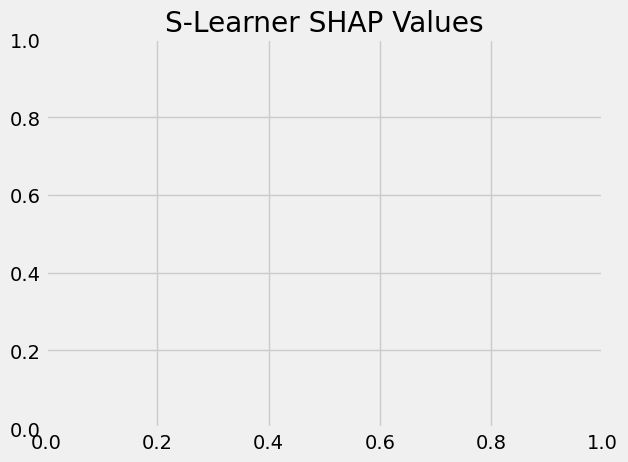

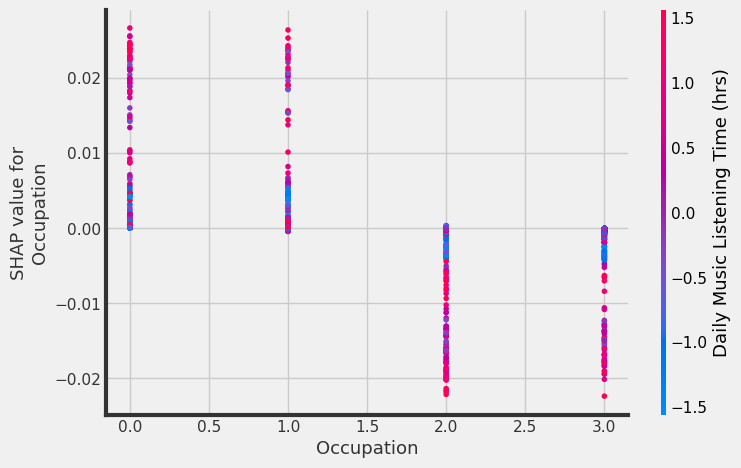

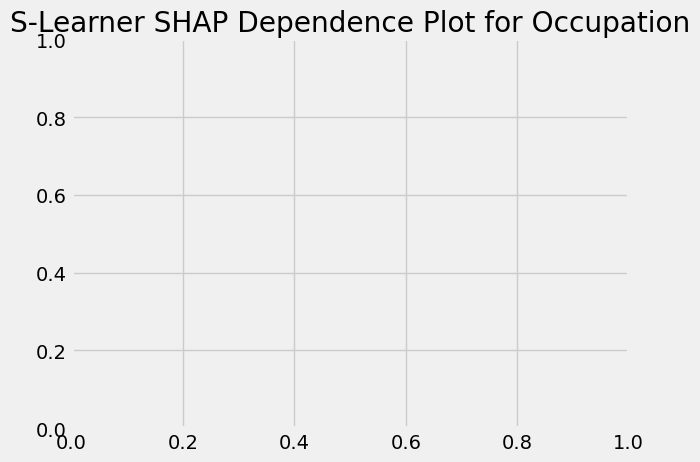

In [155]:
# Plot the SHAP summary plot (bar plot of mean |SHAP| values).
slearner.plot_shap_values(X=X_train, tau=slearner_tau_train, features=feature_names)
plt.title("S-Learner SHAP Values")
plt.show()


# --- SHAP Dependence Plot Example ---
slearner.plot_shap_dependence(
    treatment_group='treatment',
    feature_idx=feature_names[5],  # use the first feature name
    X=X_train,
    tau=slearner_tau_train,
    interaction_idx='auto',  # searches for the feature with the strongest interaction
    shap_dict=shap_values,
    features=feature_names
)
plt.title("S-Learner SHAP Dependence Plot for " + feature_names[5])
plt.show()

The SHAP summary plot provides insights into which features contribute most to the treatment effect prediction. Features such as “Daily Music Listening Time,” “Ad Interaction Count,” and “Notifications Received Daily” exhibit significant influence, which reinforces the findings we had in previous analysis. Pople who spend time on listening music, receiving more ad notifications are more likely to spend time on social media.  The news consumption, physical activities also show a great variability, indicating that people who engaged in these activities may have a very varied reusults based on their personal patterns. The SHAP dependence plot for “Occupation” further illustrates how this feature interacts with “Daily Music Listening Time,” showing that specific occupation categories may have different sensitivity to entertainment consumption.  

From the distribution of SHAP dependence plot, it is indicating that occupation has a small but varying impact on the treatment effect. Different occupational groups (encoded as 0, 1, 2, 3) show distinct SHAP value distributions, suggesting that certain professions or work conditions may correlate with the way digital engagement affects sleep quality. Occupations with higher SHAP values might be more susceptible to digital engagement affecting their sleep patterns, while those with near-zero SHAP values are less affected.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3113
[LightGBM] [Info] Number of data points in the train set: 4512, number of used features: 25
[LightGBM] [Info] Start training from score 4.997119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3116
[LightGBM] [Info] Number of data points in the train set: 4521, number of used features: 25
[LightGBM] [Info] Start training from score 4.991374
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number o

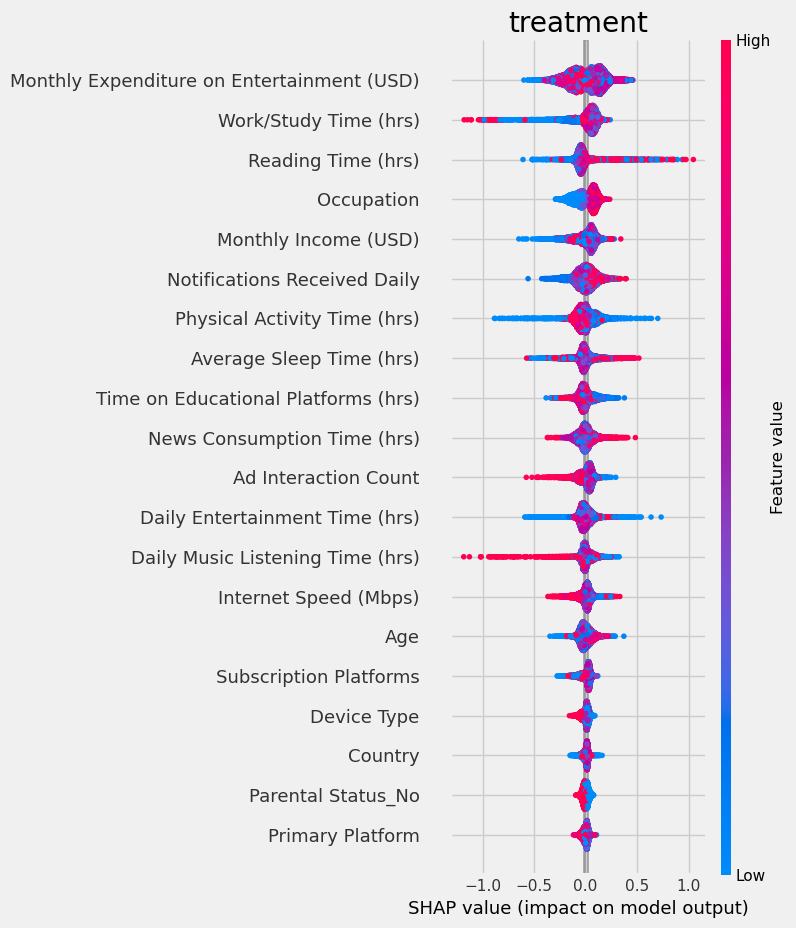

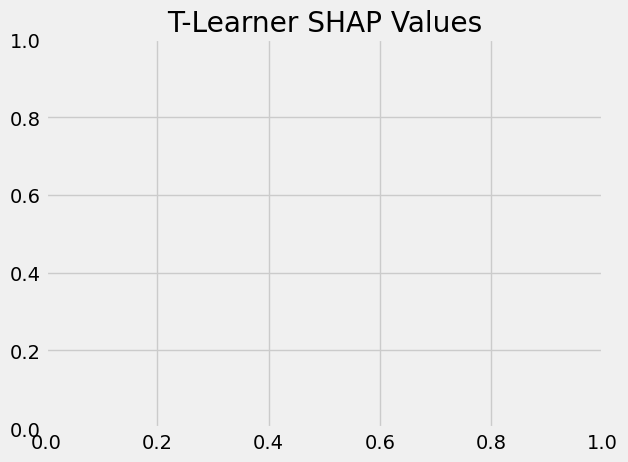

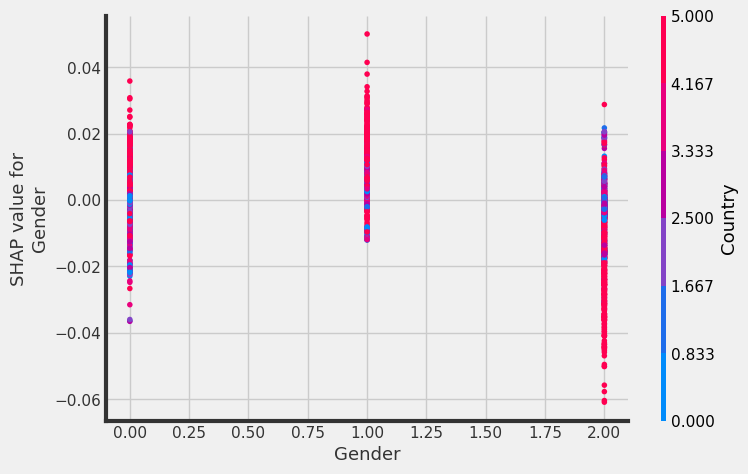

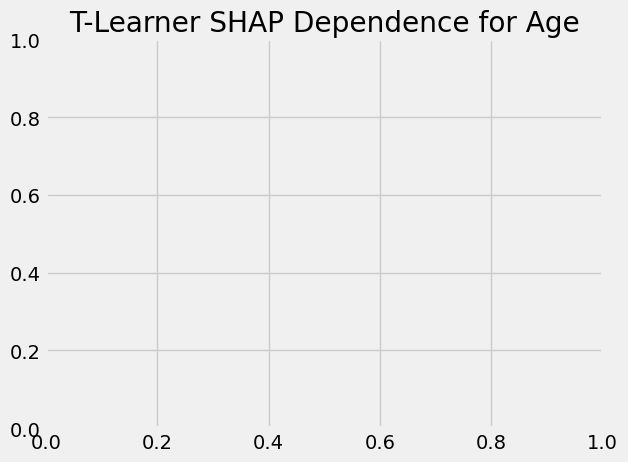

In [197]:
# --- Fit the T-Learner on the Training Set ---
# Here we use LightGBM as the base learner. (You can use XGBRegressor, RandomForestRegressor, etc.)
tlearner = BaseTRegressor(LGBMRegressor(), control_name='control')

# Fit the T-Learner and predict individual treatment effect estimates (tau) on the training set.
tlearner_tau_train = tlearner.fit_predict(X_train, w_multi_train, y_train)

# --- Get SHAP Values for the T-Learner ---
# The T-Learner returns SHAP values for each feature via its get_shap_values() method.
shap_tlearner = tlearner.get_shap_values(X=X_train, tau=tlearner_tau_train)
print("T-Learner SHAP values:")
print(shap_tlearner)

# --- Plot the T-Learner SHAP Values ---
# This will create a summary plot (bar plot of mean absolute SHAP values).
tlearner.plot_shap_values(X=X_train, tau=tlearner_tau_train, features=feature_names)
plt.title("T-Learner SHAP Values")
plt.show()

# --- (Optional) SHAP Dependence Plot for a Selected Feature ---
# For example, to see the dependence plot for the first feature:
tlearner.plot_shap_dependence(
    treatment_group='treatment',
    feature_idx=feature_names[1],  # you can also pass an index (e.g., 0) or a feature name
    X=X_train,
    tau=tlearner_tau_train,
    interaction_idx='auto',  # 'auto' lets the method find the feature with the strongest interaction
    shap_dict=shap_tlearner,
    features=feature_names
)
plt.title("T-Learner SHAP Dependence for " + feature_names[0])
plt.show()

The SHAP summary plot shows a different results that pervious method, indicates taht features such as monthly expenditure on entertainment, work/study time, and reading time have the highest influence on the treatment effect, as indicated by their SHAP values. People who spend more money in entertainment are more likley spending more time on social media, while people who spending more time on work/study or reading are less likely to spend time on social media. 

This SHAP dependence plot illustrates the influence of gender on the model’s predicted treatment effect, with the SHAP values representing the impact of gender on the outcome variable. The distribution suggests that gender has a relatively small impact, as the SHAP values are centered around zero. The presence of country-based differences further suggests that the interaction between gender and digital engagement may be moderated by cultural or socioeconomic factors.


# Conclusion

This causal inference analysis examines the impact of excessive social media use on sleep quality. Using different meta-learners (S-Learner, T-Learner, X-Learner, and R-Learner), we estimated the Average Treatment Effect (ATE) and Conditional Average Treatment Effect (CATE) while controlling for confounding factors.

The R-Learner results, using both XGBoost and Linear Regression, indicate a slight negative effect of digital engagement on sleep quality. XGBoost produces a stronger negative effect (-0.0433) compared to Linear Regression (-0.0247), highlighting the importance of model selection when capturing non-linear relationships. The histograms of CATE distributions suggest that the overall impact of excessive social media use on sleep quality is relatively small, with most estimates centered around zero 

Feature importance analysis highlights key variables influencing the treatment effect. The S-Learner identifies Daily Entertainment Time, Daily Music Listening Time, and Ad Interaction Count as top predictors, emphasizing that digital media consumption plays a dominant role. Traditional demographic factors such as age, marital status, and gender have lower importance, indicating that lifestyle and media habits are stronger determinants of sleep outcomes.

The permutation-based feature importance analysis further supports these findings but shifts focus to Monthly Income and Monthly Entertainment Expenditure as top contributors, suggesting that financial flexibility may enable greater social media consumption, possibly through premium content access and high-speed internet. Additionally, physical activity time and work/study hours play a role, indicating that individuals balancing structured activities may be less affected by excessive social media use.

SHAP analysis provides further insights into how individual features contribute to the treatment effect. Dependence plots suggest that occupation and media habits interact, with certain professions more affected by digital engagement. Gender and country-based SHAP values also show minor variation, reinforcing that demographic factors play a secondary role compared to lifestyle choices.

Overall, the causal analysis suggests that while excessive social media use has a small negative effect on sleep quality, its impact varies based on digital consumption habits, financial status, and structured activities like study and exercise.

